
# Dropout Prediction and Intervention system




# Business Goal
The dataset in a project that aims to contribute to the reduction of academic dropout and failure in higher education, by using machine learning techniques to identify students at risk at an early stage of their academic path, so that strategies to support them can be put into place.






# Import Necessary Libraries

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, roc_auc_score, auc
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

# Data Collection
* Load the data set by using pandas library, The dataset is stored in df variable.


In [264]:
df=pd.read_csv('simulated_dropout_prediction_dataset.csv')
df

,Unnamed: 0,Student_ID,Gender,Parental_Education,Attendance_Rate,Test_Scores,Socioeconomic_Status,Engagement_Score,Dropout_Risk
0,1,18,Female,Primary,73.564358,5.617608,Middle,0.147958,1
1,2,19,Male,Tertiary,98.955247,49.109573,Low,0.984654,0
2,3,17,Female,Tertiary,81.707107,92.711063,Low,0.209097,1
3,4,19,Female,Secondary,56.313237,10.539322,Low,0.130353,1
4,5,19,Male,NaN,83.808878,76.444073,Low,0.203535,1
...,...,...,...,...,...,...,...,...,...
995,996,20,Female,Secondary,64.619156,56.574495,Low,0.836079,1
996,997,19,Male,Secondary,72.195973,51.446133,Middle,0.154786,1
997,998,15,Male,Secondary,51.095666,8.505639,Low,0.301176,1
998,999,15,Female,Primary,65.052304,54.887280,Low,0.248977,1


* The data is related to student dropout risk

*  We have a total of 10000 records/rows & 9 features/columns

Here we have to check the dataset having null values or not.

In [265]:
df.isnull().sum()

Unnamed: 0                0
Student_ID                0
Gender                    0
Parental_Education      106
Attendance_Rate           0
Test_Scores               0
Socioeconomic_Status      0
Engagement_Score          0
Dropout_Risk              0
dtype: int64

From the above data actually parental_Education column having 106 None rows(means uneducated) but it is showing as null values for that we replace None with uneducated.

In [266]:
df['Parental_Education'] = df['Parental_Education'].replace('None','Uneducated')

In [267]:
df['Parental_Education'] = df['Parental_Education'].fillna('Uneducated')

In [268]:
df

,Unnamed: 0,Student_ID,Gender,Parental_Education,Attendance_Rate,Test_Scores,Socioeconomic_Status,Engagement_Score,Dropout_Risk
0,1,18,Female,Primary,73.564358,5.617608,Middle,0.147958,1
1,2,19,Male,Tertiary,98.955247,49.109573,Low,0.984654,0
2,3,17,Female,Tertiary,81.707107,92.711063,Low,0.209097,1
3,4,19,Female,Secondary,56.313237,10.539322,Low,0.130353,1
4,5,19,Male,Uneducated,83.808878,76.444073,Low,0.203535,1
...,...,...,...,...,...,...,...,...,...
995,996,20,Female,Secondary,64.619156,56.574495,Low,0.836079,1
996,997,19,Male,Secondary,72.195973,51.446133,Middle,0.154786,1
997,998,15,Male,Secondary,51.095666,8.505639,Low,0.301176,1
998,999,15,Female,Primary,65.052304,54.887280,Low,0.248977,1


In [269]:
df.isnull().sum()

Unnamed: 0              0
Student_ID              0
Gender                  0
Parental_Education      0
Attendance_Rate         0
Test_Scores             0
Socioeconomic_Status    0
Engagement_Score        0
Dropout_Risk            0
dtype: int64

* Here we check null values there is no null values in the data,for that we created null values.

In [270]:
# 1. Replace ~10% of Test_Scores with null values
df.loc[df.sample(frac=0.1, random_state=42).index, 'Test_Scores'] = np.nan
# 2. Replace ~5% of Parental_Education with null values
df.loc[df.sample(frac=0.05, random_state=42).index, 'Parental_Education'] = np.nan
df

,Unnamed: 0,Student_ID,Gender,Parental_Education,Attendance_Rate,Test_Scores,Socioeconomic_Status,Engagement_Score,Dropout_Risk
0,1,18,Female,Primary,73.564358,5.617608,Middle,0.147958,1
1,2,19,Male,Tertiary,98.955247,49.109573,Low,0.984654,0
2,3,17,Female,Tertiary,81.707107,92.711063,Low,0.209097,1
3,4,19,Female,Secondary,56.313237,10.539322,Low,0.130353,1
4,5,19,Male,Uneducated,83.808878,76.444073,Low,0.203535,1
...,...,...,...,...,...,...,...,...,...
995,996,20,Female,Secondary,64.619156,56.574495,Low,0.836079,1
996,997,19,Male,Secondary,72.195973,51.446133,Middle,0.154786,1
997,998,15,Male,Secondary,51.095666,8.505639,Low,0.301176,1
998,999,15,Female,Primary,65.052304,NaN,Low,0.248977,1


* Here we created null values for Parental_Education and Test_scores columns
#### For Test_Scores
* Randomly selects 10% of the rows from the data. The frac=0.1 indicates that 10% of the data should be sampled. The random_state=42 ensures reproducibility, meaning the same rows will be selected every time you run this code.
#### For Parental_Education
Randomly selects 5% of the rows from the data.



In [271]:
df=df.drop(columns=["Unnamed: 0","Student_ID"],axis=1)

In [272]:
df.isnull().sum()

Gender                    0
Parental_Education       50
Attendance_Rate           0
Test_Scores             100
Socioeconomic_Status      0
Engagement_Score          0
Dropout_Risk              0
dtype: int64

we Checked whether the null values are created or not.

In [273]:
df.head()

,Gender,Parental_Education,Attendance_Rate,Test_Scores,Socioeconomic_Status,Engagement_Score,Dropout_Risk
0,Female,Primary,73.564358,5.617608,Middle,0.147958,1
1,Male,Tertiary,98.955247,49.109573,Low,0.984654,0
2,Female,Tertiary,81.707107,92.711063,Low,0.209097,1
3,Female,Secondary,56.313237,10.539322,Low,0.130353,1
4,Male,Uneducated,83.808878,76.444073,Low,0.203535,1


## Data Validation

In [274]:
df.shape

(1000, 7)

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1000 non-null   object 
 1   Parental_Education    950 non-null    object 
 2   Attendance_Rate       1000 non-null   float64
 3   Test_Scores           900 non-null    float64
 4   Socioeconomic_Status  1000 non-null   object 
 5   Engagement_Score      1000 non-null   float64
 6   Dropout_Risk          1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


## Info about each and every feature of the data


1. Unnamed: 0: Likely an unnecessary index column.
2. Student_ID: Identifier for students.
3. Gender: Gender of the student (e.g., Male, Female).
4. Parental_Education: Level of education achieved by the parents (e.g., Primary, Secondary, Tertiary).
5. Attendance_Rate: Percentage of attendance for the student.
6. Test_Scores: Academic test scores of the student.
7. Socioeconomic_Status: Socioeconomic background of the student (e.g., Low, Middle, High).
8. Engagement_Score: A numerical measure of student engagement.
9. Dropout_Risk: A binary indicator (0 or 1) for dropout risk.




In [276]:
df.describe()

,Attendance_Rate,Test_Scores,Engagement_Score,Dropout_Risk
count,1000.000000,900.000000,1000.000000,1000.000000
mean,74.940152,49.412824,0.498025,0.794000
std,14.491474,28.957664,0.291075,0.404633
min,50.000582,0.003072,0.003918,0.000000
25%,63.377251,23.369283,0.244490,1.000000
50%,74.910888,49.036010,0.489106,1.000000
75%,87.147971,75.039174,0.752218,1.000000
max,99.891043,99.955770,0.999461,1.000000


**Count** : The number of non-missing entries for each column.
For most columns, it's 1000, but Test_Scores has only 900 entries, indicating 100 missing or unavailable data points.

**Mean (Average)** : Gives the average value for each column.
Example: The average Attendance_Rate is 74.94%, and the average Dropout_Risk is 0.794, suggesting ~79.4% of students are at high dropout risk.

**Standard Deviation (std)** : Measures the spread or variation in the data.
Example: Test_Scores has a std of 28.96, indicating relatively high variability compared to Dropout_Risk (std = 0.40).

**Min and Max** : Indicate the smallest and largest values in each column.
Example: The lowest Test_Scores is close to 0, while the highest is nearly 100.

**Percentiles (25%, 50%, 75%)** :

Divide the data into quarters:

25%: 25% of values fall below this value.

50% (Median): Half of the data falls below this value.

75%: 75% of values fall below this value.

Example: The median Attendance_Rate is ~74.91%, while 75% of students have attendance rates below 87.15%.

We dropped Unnamed column because there is no use of that column.

                                       Parental_Education

In [277]:
df['Parental_Education'].unique()

array(['Primary', 'Tertiary', 'Secondary', 'Uneducated', nan],
      dtype=object)

In [278]:
df['Parental_Education'].value_counts()

Parental_Education
Secondary     402
Primary       267
Tertiary      184
Uneducated     97
Name: count, dtype: int64

                                                Socioeconomic_Status

In [279]:
df['Socioeconomic_Status'].unique()

array(['Middle', 'Low', 'High'], dtype=object)

In [280]:
df['Socioeconomic_Status'].value_counts()

Socioeconomic_Status
Low       410
Middle    397
High      193
Name: count, dtype: int64

#**EDA**
##**Univariate**:
Univariate analysis examines one variable at a time to understand its distribution, central tendency, and variability.

**Steps for Univariate Analysis**
1. Categorical Variables

    * Gender, Parental_Education, Socioeconomic_Status, and Dropout_Risk.
    * Analyze using frequency counts, proportions, and visualizations like bar charts or pie charts.
2. Numerical Variables

    * Attendance_Rate, Test_Scores, and Engagement_Score.
    * Analyze using descriptive statistics (mean, median, standard deviation, etc.), histograms, and box plots to observe distribution and detect outliers.
3. Missing Data Analysis

   * Evaluate missing data proportions in variables like Test_Scores and Parental_Education.

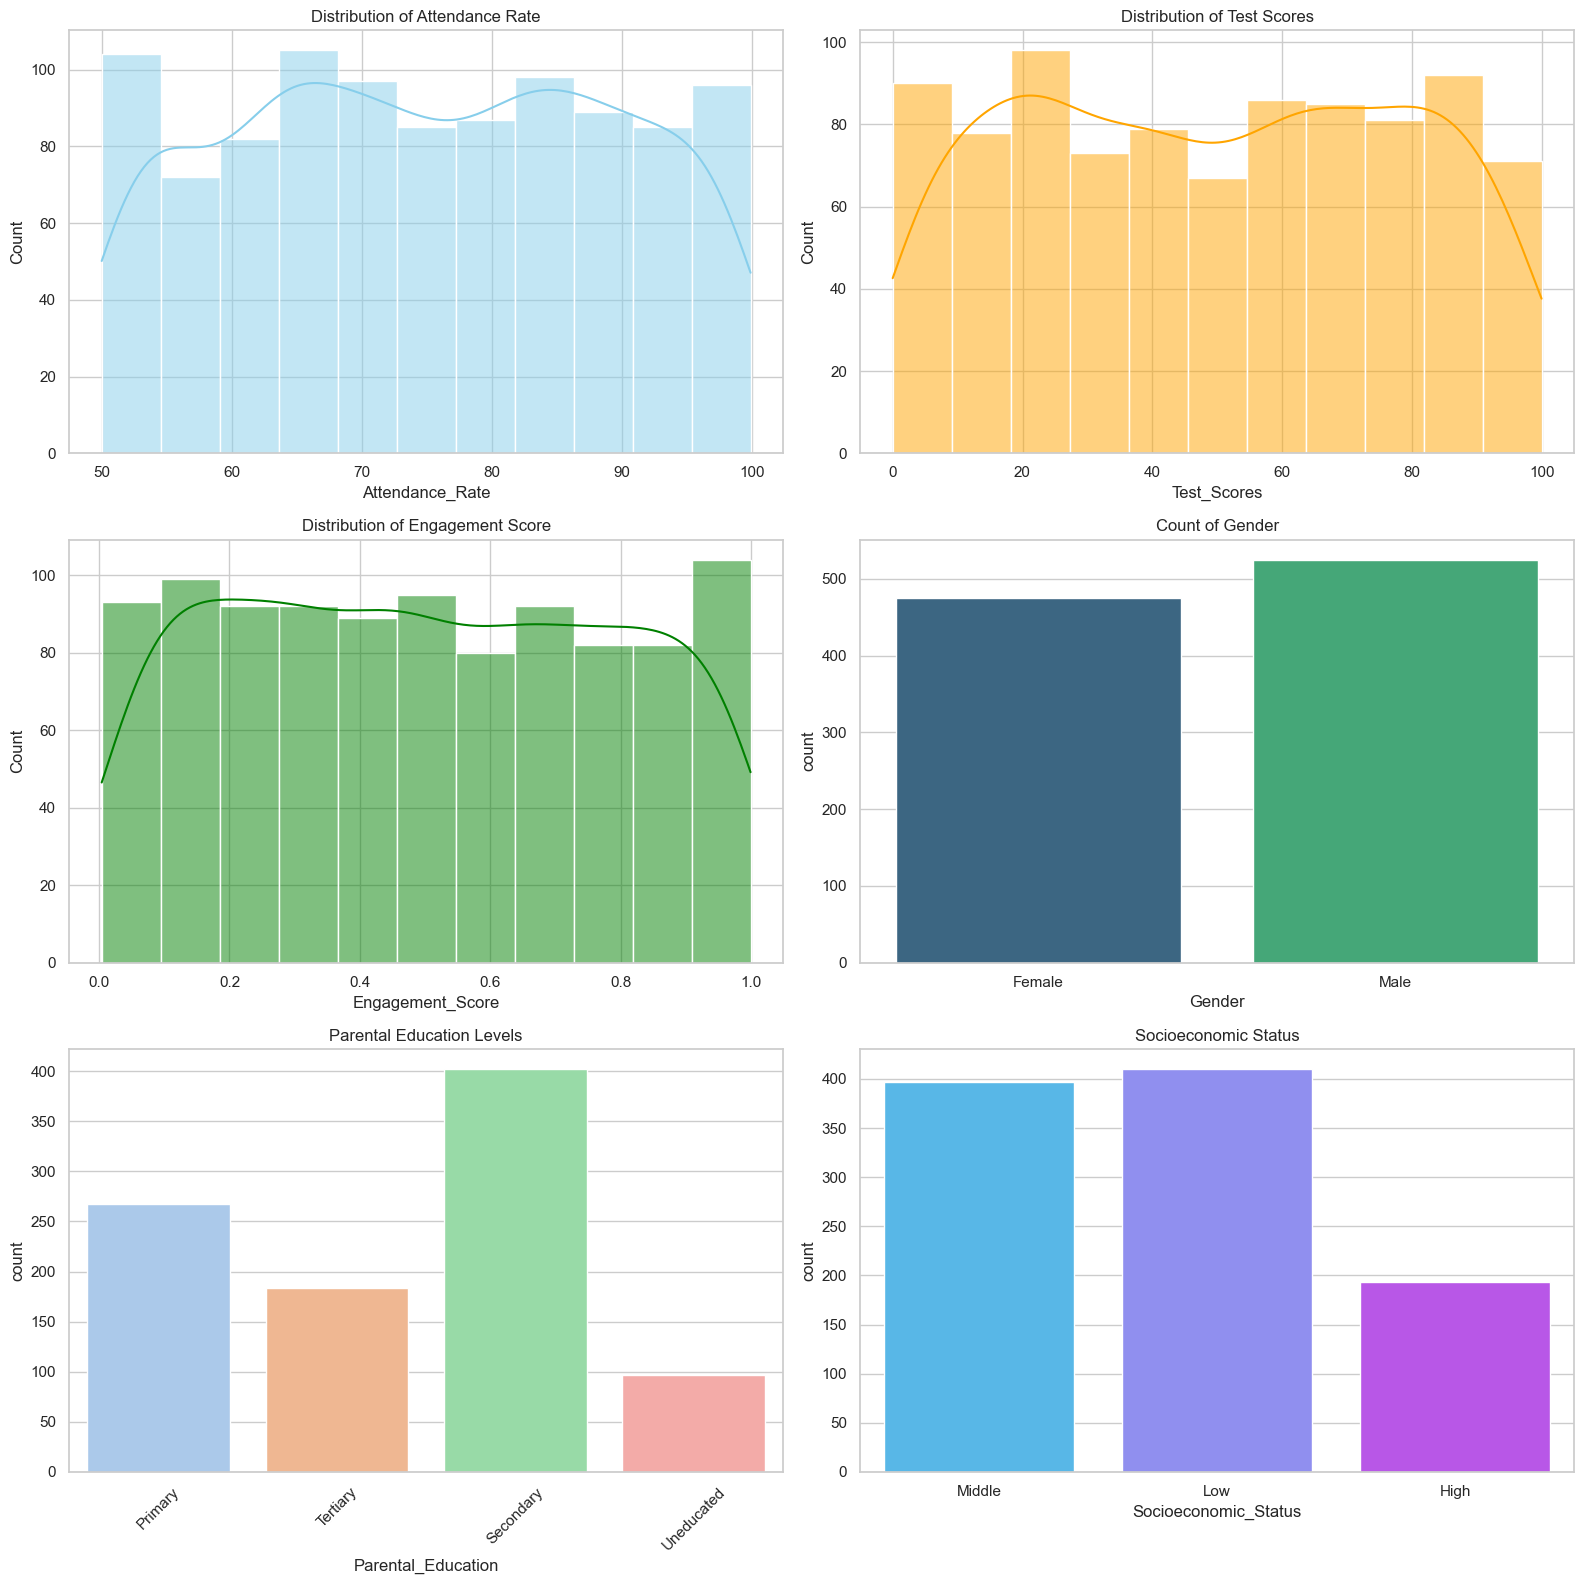

In [281]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Create subplots for univariate visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 16))

# Numeric variables distributions
sns.histplot(df['Attendance_Rate'], kde=True, ax=axes[0, 0], color="skyblue")
axes[0, 0].set_title("Distribution of Attendance Rate")

sns.histplot(df['Test_Scores'], kde=True, ax=axes[0, 1], color="orange")
axes[0, 1].set_title("Distribution of Test Scores")

sns.histplot(df['Engagement_Score'], kde=True, ax=axes[1, 0], color="green")
axes[1, 0].set_title("Distribution of Engagement Score")

# Categorical variables distributions
sns.countplot(x='Gender', data=df, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title("Count of Gender")

sns.countplot(x='Parental_Education', data=df, ax=axes[2, 0], palette="pastel")
axes[2, 0].set_title("Parental Education Levels")
axes[2, 0].tick_params(axis='x', rotation=45)

sns.countplot(x='Socioeconomic_Status', data=df, ax=axes[2, 1], palette="cool")
axes[2, 1].set_title("Socioeconomic Status")

# Adjust layout
plt.tight_layout()
plt.show()

**histplot** : Used to plot distributions for numeric variables (Attendance_Rate, Test_Scores, Engagement_Score).

**countplot** : Used for bar plots of categorical variables (Gender, Parental_Education, Socioeconomic_Status).

**subplots**: Creates a grid layout for multiple plots in one figure.

**kde=True**: Adds a kernel density estimate (smooth curve) to histograms for numeric variables.

#**Insights**
1. Attendance Rate: Most students have moderate to high attendance.
2. Test Scores: Students are split between high and low performers, with fewer in the middle.
3. Engagement Score: Engagement levels are varied, with some fully engaged and others not.
4. Gender: Males are more educated.
5. Parental Education: Most parents have secondary education
6. Socioeconomic Status: Most students are from middle or low socioeconomic backgrounds.


## **Bivariate Analysis**:
Bivariate analysis examines the relationship between two variables to identify patterns, correlations

**Steps for Univariate Analysis**
1. Categorical vs Categorical:
    * Gender vs. Dropout_Risk
    * Parental_Education vs. Socioeconomic_Status

2. Numerical vs. Numerical
    * Attendance_Rate vs. Test_Scores
    * Engagement_Score vs. Test_Scores
3. Categorical vs. Numerical
    * Gender vs. Attendance_Rate
    * Dropout_Risk vs. Test_Score

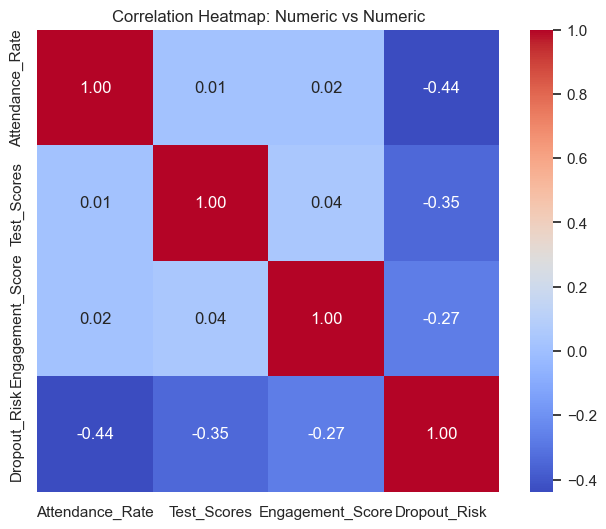

In [282]:
# Numeric variables only
numeric_cols = ['Attendance_Rate', 'Test_Scores', 'Engagement_Score', 'Dropout_Risk']

# Correlation matrix
numeric_corr_matrix = df[numeric_cols].corr()

# Heatmap for numeric variables
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap: Numeric vs Numeric")
plt.show()

**Insights**
* Higher attendance and test scores are moderately linked to lower dropout risk, while engagement has a weaker impact.

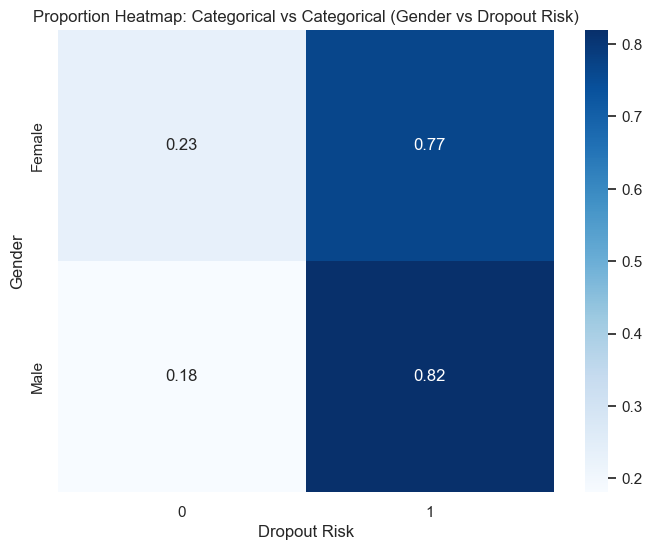

In [283]:
# Create a cross-tabulation for Gender and Dropout Risk
categorical_ct = pd.crosstab(df['Gender'], df['Dropout_Risk'], normalize='index')

# Heatmap for categorical variables
plt.figure(figsize=(8, 6))
sns.heatmap(categorical_ct, annot=True, fmt=".2f", cmap="Blues", cbar=True)
plt.title("Proportion Heatmap: Categorical vs Categorical (Gender vs Dropout Risk)")
plt.ylabel("Gender")
plt.xlabel("Dropout Risk")
plt.show()

**Insights**
* From the above analysis,
   * Male students have a slightly higher dropout risk (82%) compared to female students (77%), indicating a need for targeted interventions for both genders.

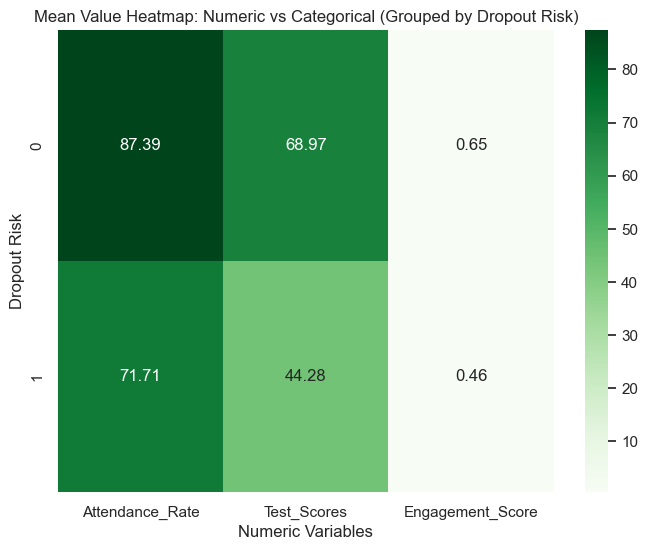

In [284]:
# Mean values of numeric columns grouped by Dropout Risk
numeric_vs_categorical = df.groupby('Dropout_Risk')[numeric_cols[:-1]].mean()

# Heatmap for numeric vs categorical
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_vs_categorical, annot=True, fmt=".2f", cmap="Greens", cbar=True)
plt.title("Mean Value Heatmap: Numeric vs Categorical (Grouped by Dropout Risk)")
plt.ylabel("Dropout Risk")
plt.xlabel("Numeric Variables")
plt.show()

* From the above analysis,
  * Students at low dropout risk demonstrate significantly higher attendance rates (87.39%), test scores (68.97), and engagement scores (0.65) compared to those at high dropout risk, emphasizing the importance of these factors in dropout prevention.

# Feature Engineering

##Handling Null_Values


In [285]:
df.isnull().sum()

Gender                    0
Parental_Education       50
Attendance_Rate           0
Test_Scores             100
Socioeconomic_Status      0
Engagement_Score          0
Dropout_Risk              0
dtype: int64

* Here Parental_Education having 50 null values and Test_Scores having 100 null values.
* Parental_Education is related to categorical data so, we use mode technique.

In [286]:
# Handle null values for 'Parental_Education' (Categorical)
Parental_Education_mode = df['Parental_Education'].mode()[0]  # Get the most frequent value
df['Parental_Education'].fillna(Parental_Education_mode, inplace=True)

In [287]:
df.isnull().sum()

Gender                    0
Parental_Education        0
Attendance_Rate           0
Test_Scores             100
Socioeconomic_Status      0
Engagement_Score          0
Dropout_Risk              0
dtype: int64

* Test_Scores are related to numerical data so, we use mean,median and mode techniques for handling null values.

In [288]:
def missing_data(df,var,mean,median,mode):
  df[var+'_mean']=df[var].fillna(mean)
  df[var+'_median']=df[var].fillna(median)
  df[var+'_mode']=df[var].fillna(mode[0])

In [289]:
Test_Scores_mean = df['Test_Scores'].mean()
Test_Scores_median = df['Test_Scores'].median()
Test_Scores_mode = df['Test_Scores'].mode()

In [290]:
missing_data(df,'Test_Scores',Test_Scores_mean,Test_Scores_median,Test_Scores_mode)

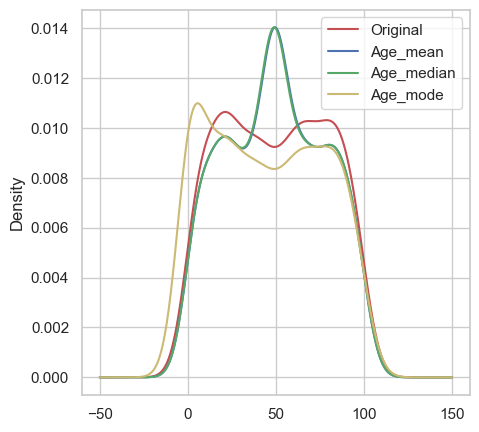

In [291]:
plt.figure(figsize =(5,5))
df['Test_Scores'].plot(kind='kde',color='r',label='Original')
df['Test_Scores_mean'].plot(kind='kde',color='b',label='Age_mean')
df['Test_Scores_median'].plot(kind='kde',color='g',label='Age_median')
df['Test_Scores_mode'].plot(kind='kde',color='y',label='Age_mode')

plt.legend(loc =0)
plt.show()

* We plot one graph to find the best technique from mean,median and mode, the graph shows median as best technique to fillnull values.

In [292]:
# Handle null values for 'Test_Scores' (Numerical)
Test_Scores_median = df['Test_Scores'].median()
df['Test_Scores'].fillna( Test_Scores_median,inplace=True)

In [293]:
df=df.drop(['Test_Scores_mean','Test_Scores_mode','Test_Scores'],axis=1)

In [294]:
df.isnull().sum()

Gender                  0
Parental_Education      0
Attendance_Rate         0
Socioeconomic_Status    0
Engagement_Score        0
Dropout_Risk            0
Test_Scores_median      0
dtype: int64

## Outliers
* An outlier is a data point that lies far from other observations and doesn’t follow the expected pattern of the dataset.

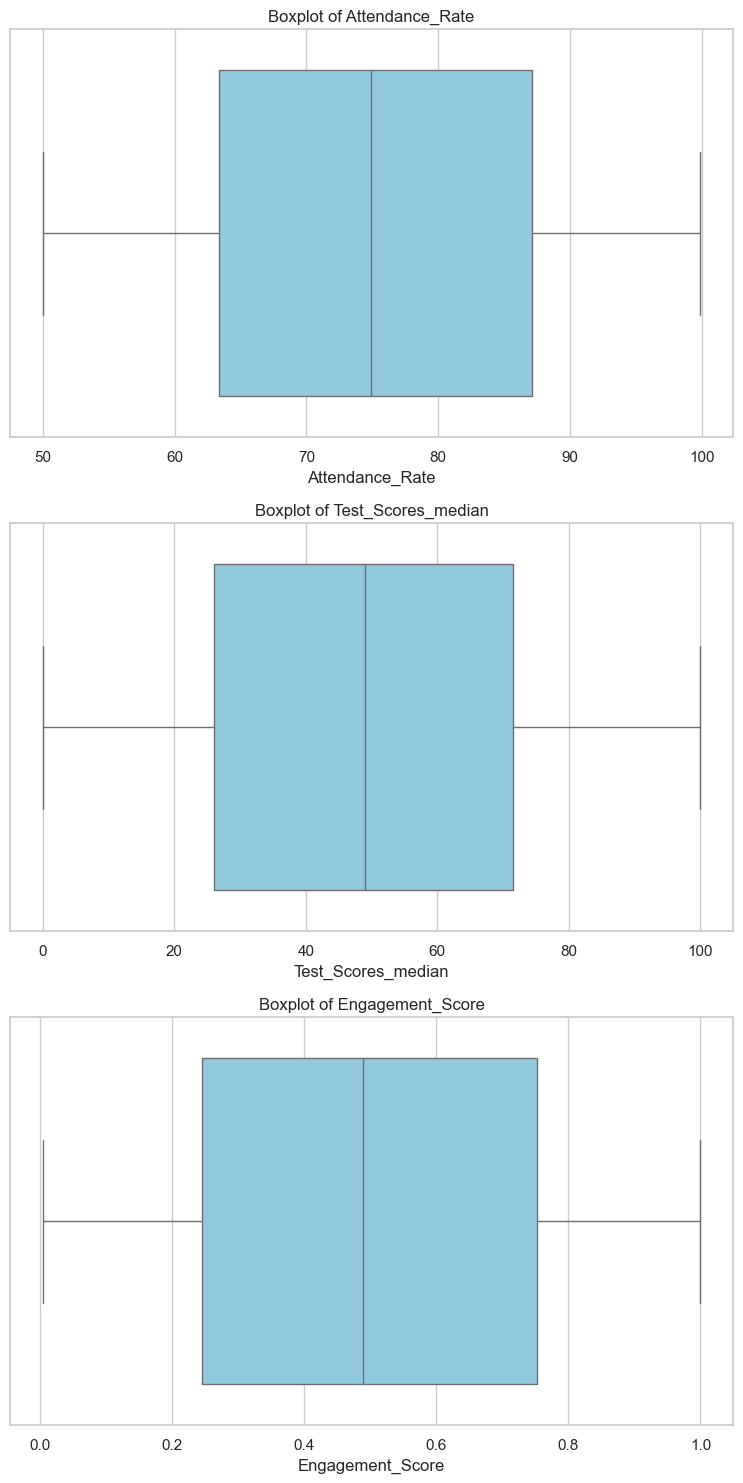

In [295]:
def visualize_outliers(df, numeric_columns):
    plt.figure(figsize=(15, 15))

    for i, col in enumerate(numeric_columns, start=1):
        plt.subplot(len(numeric_columns), 2, 2 * i - 1)
        sns.boxplot(df[col], orient='h', color='skyblue')
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()
numeric_columns = ["Attendance_Rate", "Test_Scores_median", "Engagement_Score"]
visualize_outliers(df, numeric_columns)

* There is no outliers in the data so no need of handle outliers.

# Predictive Modeling

* Building a predictive model/trained algorithm to get the relation betweeen one columns(y) to other columns (X)

    y = f(x)+e

#### 4.1 Selecting X & y

* Selecting Output column (y) - future prediction column & Input column/columns (X) - Reference columns

    -  X (independent variables/input columns/explanatory variables)
    - y (dependent variable/output column/response column

In [296]:
df.head()

,Gender,Parental_Education,Attendance_Rate,Socioeconomic_Status,Engagement_Score,Dropout_Risk,Test_Scores_median
0,Female,Primary,73.564358,Middle,0.147958,1,5.617608
1,Male,Tertiary,98.955247,Low,0.984654,0,49.109573
2,Female,Tertiary,81.707107,Low,0.209097,1,92.711063
3,Female,Secondary,56.313237,Low,0.130353,1,10.539322
4,Male,Uneducated,83.808878,Low,0.203535,1,76.444073


* Here Dropout_risk as output(y) and remaining columns are inputs(X)

In [297]:
df.select_dtypes('object')

,Gender,Parental_Education,Socioeconomic_Status
0,Female,Primary,Middle
1,Male,Tertiary,Low
2,Female,Tertiary,Low
3,Female,Secondary,Low
4,Male,Uneducated,Low
...,...,...,...
995,Female,Secondary,Low
996,Male,Secondary,Middle
997,Male,Secondary,Low
998,Female,Primary,Low


* We need to convert categorical columns into numerical columns for that we use ordinal encoding to parental_Education and Socioeconomic_status.

In [298]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Initialize the OrdinalEncoder for both columns
ordinal_encoder = OrdinalEncoder()

# Apply OrdinalEncoder to the columns
df['Parental_Education'] = ordinal_encoder.fit_transform(df[['Parental_Education']]).astype(int)
df['Socioeconomic_Status'] = ordinal_encoder.fit_transform(df[['Socioeconomic_Status']]).astype(int)


* Here Parental_Education column having [Uneducated,Primary,secondary,territary] all give to OrdinalEncoder. It converts Categorical to numerical data as [0,1,2,3].
* Here socioeconomic_status column having [Low,medium,high] all give to OrdinalEncoder. It converts Categorical to numerical data as [0,1,2].

In [299]:
df


,Gender,Parental_Education,Attendance_Rate,Socioeconomic_Status,Engagement_Score,Dropout_Risk,Test_Scores_median
0,Female,0,73.564358,2,0.147958,1,5.617608
1,Male,2,98.955247,1,0.984654,0,49.109573
2,Female,2,81.707107,1,0.209097,1,92.711063
3,Female,1,56.313237,1,0.130353,1,10.539322
4,Male,3,83.808878,1,0.203535,1,76.444073
...,...,...,...,...,...,...,...
995,Female,1,64.619156,1,0.836079,1,56.574495
996,Male,1,72.195973,2,0.154786,1,51.446133
997,Male,1,51.095666,1,0.301176,1,8.505639
998,Female,0,65.052304,1,0.248977,1,49.036010


* Gender having only two labels so we give 0 as male and 1 as female.

---



In [300]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1}).astype(int)

In [301]:
df

,Gender,Parental_Education,Attendance_Rate,Socioeconomic_Status,Engagement_Score,Dropout_Risk,Test_Scores_median
0,1,0,73.564358,2,0.147958,1,5.617608
1,0,2,98.955247,1,0.984654,0,49.109573
2,1,2,81.707107,1,0.209097,1,92.711063
3,1,1,56.313237,1,0.130353,1,10.539322
4,0,3,83.808878,1,0.203535,1,76.444073
...,...,...,...,...,...,...,...
995,1,1,64.619156,1,0.836079,1,56.574495
996,0,1,72.195973,2,0.154786,1,51.446133
997,0,1,51.095666,1,0.301176,1,8.505639
998,1,0,65.052304,1,0.248977,1,49.036010


* All the above data is in numerical format only.

In [302]:
X = df.drop(['Dropout_Risk'], axis = 1)
y = df['Dropout_Risk']

* Selects the 'Dropout_Risk' column from df and assigns it to y

In [303]:
X

,Gender,Parental_Education,Attendance_Rate,Socioeconomic_Status,Engagement_Score,Test_Scores_median
0,1,0,73.564358,2,0.147958,5.617608
1,0,2,98.955247,1,0.984654,49.109573
2,1,2,81.707107,1,0.209097,92.711063
3,1,1,56.313237,1,0.130353,10.539322
4,0,3,83.808878,1,0.203535,76.444073
...,...,...,...,...,...,...
995,1,1,64.619156,1,0.836079,56.574495
996,0,1,72.195973,2,0.154786,51.446133
997,0,1,51.095666,1,0.301176,8.505639
998,1,0,65.052304,1,0.248977,49.036010


In [304]:
X.columns

Index(['Gender', 'Parental_Education', 'Attendance_Rate',
       'Socioeconomic_Status', 'Engagement_Score', 'Test_Scores_median'],
      dtype='object')

In [305]:
X.shape

(1000, 6)

* Saving all independent columns in one file

In [306]:
X.to_csv('Drop.csv',index=False)

In [307]:
y

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Dropout_Risk, Length: 1000, dtype: int64

In [308]:
y.shape

(1000,)

## Splitting of X & Y for Train & Test
* Dividing data into two parts, train-test
    - train part used for model building
    - test part is used for model evaluation

In [309]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state =42)

In [310]:
len(X_train),len(y_train)

(900, 900)

In [311]:
len(X_test),len(y_test)

(100, 100)

Model Training

Using xtrain, ytrain data Using fit command to train the defined model with xtrain, ytrain



## Algorithm Training on trained data
* In Classification we have below algorithms

    * Logistic Regression
    * Knearest Neighbors (KNN)
    * Support Vector Machine (SVM)
    * Naive Bayes (NB)
    * Decision Trees
    * Random Forest (Bagging)
    * Xgboost (Boosting)

Giving X_train,y_train data to all the above models to get better performance Model.

# Logistic Regression

#### Logistic Regression

It uses the Linear Regression line to convert it into a sigmoid curve with the logit function output as probability of class

In [312]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [313]:
log.intercept_

array([18.89747482])

In [314]:
log.coef_

array([[-0.47990899, -0.10235096, -0.14681436, -0.06797473, -3.74705241,
        -0.05493415]])

#### KNN - K Nearest Neighbors

* It will take the nearest data points using euclidean distance metric with number of k given

* It is a lazy algorithm , it wont train the data instead it will store the data

* It will do the training when test data given

In [315]:
 knn = KNeighborsClassifier(n_neighbors=5)
 knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Naive Bayes

* Naive Bayes works on Bayesian Probability formula

In [316]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

#### SVM (Time Taking for Higher Dimensional Data)

* Support vectors (Data Points grouped with Soft Margin Classifier) - for linear data

* for non-linear data kernel trick is used to divide classes - rbf , poly

In [317]:
sv=SVC(kernel='rbf')
sv.fit(X_train,y_train)

SVC()

#### Decision Tree

* Logic Tree based predictions based on root and interior nodes, branches

In [318]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

#### Random Forest

* Bagging algorithm which was a combination of Multiple Decision Trees

In [319]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [320]:
rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=1772032634),
 DecisionTreeClassifier(max_features='sqrt', random_state=589452422),
 DecisionTreeClassifier(max_features='sqrt', random_state=361611478),
 DecisionTreeClassifier(max_features='sqrt', random_state=227581427),
 DecisionTreeClassifier(max_features='sqrt', random_state=178185237),
 DecisionTreeClassifier(max_features='sqrt', random_state=2056479996),
 DecisionTreeClassifier(max_features='sqrt', random_state=1688128371),
 DecisionTreeClassifier(max_features='sqrt', random_state=77305662),
 DecisionTreeClassifier(max_features='sqrt', random_state=1950267667),
 DecisionTreeClassifier(max_features='sqrt', random_state=351898807),
 DecisionTreeClassifier(max_features='sqrt', random_state=556276762),
 DecisionTreeClassifier(max_features='sqrt', random_state=109557703),
 DecisionTreeClassifier(max_features='sqrt', random_state=777507687),
 DecisionTreeClassifier(max_features='sqrt', random_state=1871248521),
 DecisionTreeCla

### Xgboost

* Boosting Algorithm where for the selected number of models , one model error will be trained by another model

        

In [321]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

#### 4.5 Model Evaluation/Performance<a id='eval'>

* Checking Trained Model Performances on Test Data

* Using x_test data we will be getting predictions, these predictions will be compared to y_test

* To check Model Performance we can use evaluation methods

    * Bias-Variance Trade off (Underfit or Overfit)
    * Cross-Val Score

* **For classification we can use these evaluation**
    


Performance Metric | Classification
-------|-----------
**Confusion Matrix (Number of right/wrong predictions)**
**Bias-Variance Trade Off**|Higher error & Lower score (underfit)
-|Low Train error & High Test error (Overfit)
**Cross-Val Score**|Checking trained model performance on entire X and y data

# Model Evaluation

* Checking the above models performance using Test data

In [322]:
names = ['LogisticRegression', 'KNearestNeighbors', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest', 'Xgboost']
models = [log, knn, nb, sv, dt, rf, xgb]

In [323]:
!pip install simple_colors


Defaulting to user installation because normal site-packages is not writeable


* For finding confusion confusion matrix and classification report

Model: LogisticRegression

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.26      0.32        19
           1       0.84      0.91      0.88        81

    accuracy                           0.79       100
   macro avg       0.63      0.59      0.60       100
weighted avg       0.76      0.79      0.77       100

Confusion_Matrix:


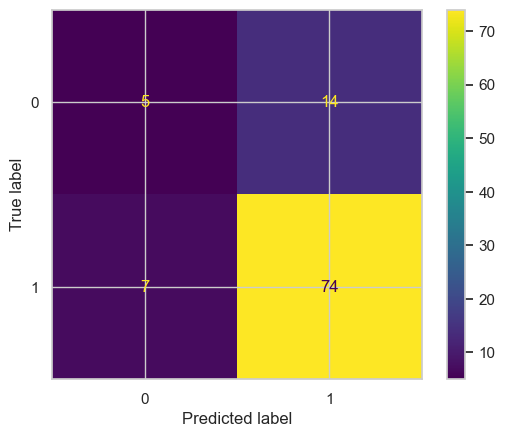

-----------------------------------------------------------------------------------
Model: KNearestNeighbors

Classification Report:
               precision    recall  f1-score   support

           0       0.36      1.00      0.53        19
           1       1.00      0.58      0.73        81

    accuracy                           0.66       100
   macro avg       0.68      0.79      0.63       100
weighted avg       0.88      0.66      0.70       100

Confusion_Matrix:


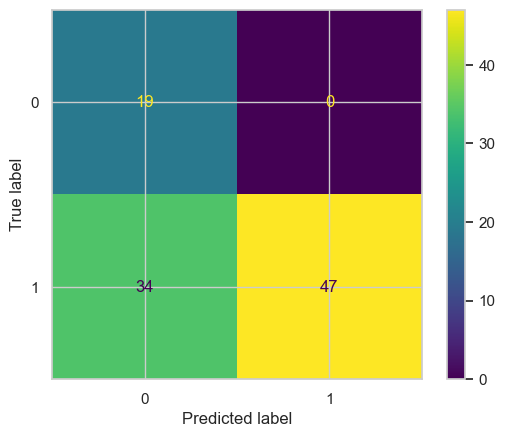

-----------------------------------------------------------------------------------
Model: Naive Bayes

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.53      0.54        19
           1       0.89      0.90      0.90        81

    accuracy                           0.83       100
   macro avg       0.72      0.71      0.72       100
weighted avg       0.83      0.83      0.83       100

Confusion_Matrix:


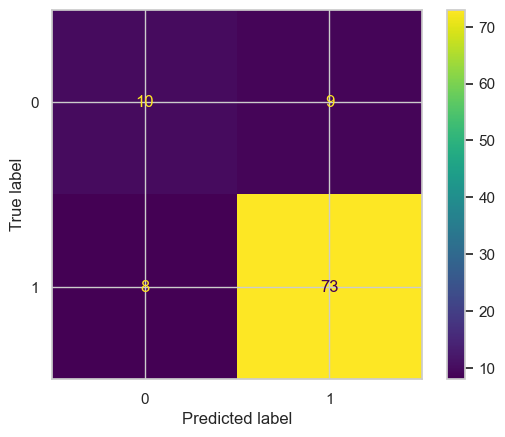

-----------------------------------------------------------------------------------
Model: SVM

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.58      0.44        19
           1       0.88      0.75      0.81        81

    accuracy                           0.72       100
   macro avg       0.62      0.67      0.63       100
weighted avg       0.78      0.72      0.74       100

Confusion_Matrix:


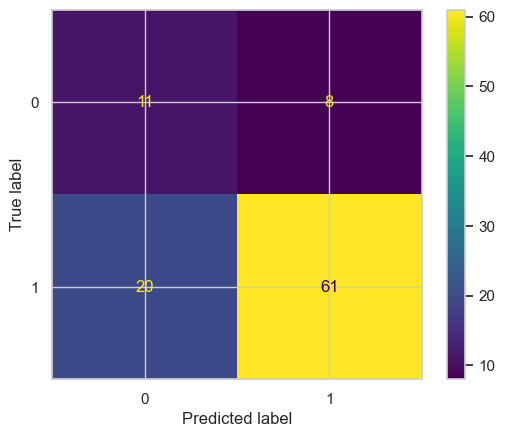

-----------------------------------------------------------------------------------
Model: Decision Tree

Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        19
           1       1.00      0.79      0.88        81

    accuracy                           0.83       100
   macro avg       0.76      0.90      0.79       100
weighted avg       0.91      0.83      0.85       100

Confusion_Matrix:


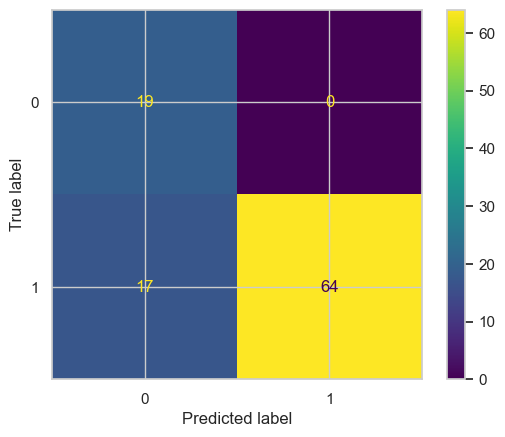

-----------------------------------------------------------------------------------
Model: Random Forest

Classification Report:
               precision    recall  f1-score   support

           0       0.53      1.00      0.69        19
           1       1.00      0.79      0.88        81

    accuracy                           0.83       100
   macro avg       0.76      0.90      0.79       100
weighted avg       0.91      0.83      0.85       100

Confusion_Matrix:


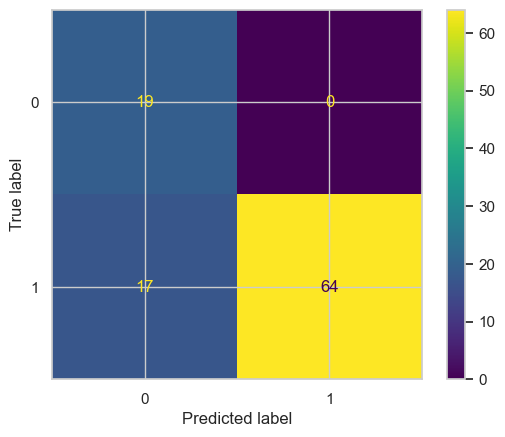

-----------------------------------------------------------------------------------
Model: Xgboost

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.36      0.53       100
           1       0.00      0.00      0.00         0

    accuracy                           0.36       100
   macro avg       0.50      0.18      0.26       100
weighted avg       1.00      0.36      0.53       100

Confusion_Matrix:


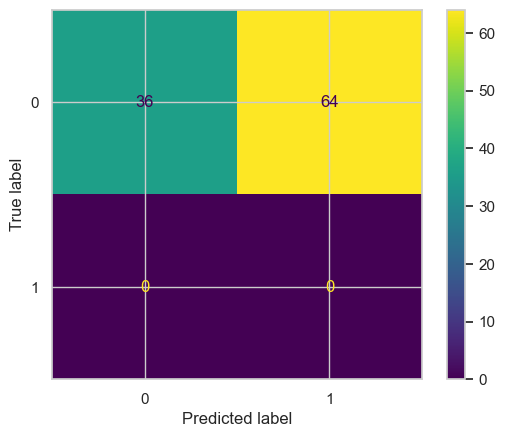

-----------------------------------------------------------------------------------


In [324]:
from simple_colors import *
for i in range(len(models)):
    print(green("Model: {}\n".format(names[i]),['bold']))
    if models[i] == xgb:
        y_test_pred = models[i].predict(X_test)
        y_test_xg = np.where(y_test == 'yes',1,0)
        print("Classification Report:\n",classification_report(y_test_xg, y_test_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], X_test, y_test_xg))
        print("-----------------------------------------------------------------------------------")
    else:
        y_test_pred = models[i].predict(X_test)
        print("Classification Report:\n",classification_report(y_test, y_test_pred))
        print(blue("Confusion_Matrix:",['bold']))
        plt.show(ConfusionMatrixDisplay.from_estimator(models[i], X_test, y_test))
        print("-----------------------------------------------------------------------------------")

Based on accuracy and confusion matrix Random Forest and Decision tree are the best models.
 To choose one Best model,we perform Modelfitting.

* **Check accuracy score for train and test data to decide best model**

In [325]:
trainscore = []
testscore = []
fit = []
crossvalscore = []
accuracy=[]
loss=[]

In [326]:
for i in range(len(models)):

    if models[i] == xgb:

        y_train_xg = np.where(y_train == 'yes',1,0)
        y_test_xg = np.where(y_test == 'yes',1,0)

        ytrain_pred = models[i].predict(X_train)
        ytest_pred = models[i].predict(X_test)

        # Accuracy Score
        acc_score_tr = round(accuracy_score(y_train_xg, y_train_pred),2)
        acc_score_te = round(accuracy_score(y_test_xg, y_test_pred),2)

        trainscore.append(acc_score_tr)
        testscore.append(acc_score_te)

        # Bias-Variance Trade off
        trscore = acc_score_tr
        tescore = acc_score_te

        if trscore<0.50 and tescore<0.50:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")

        else:
            if abs(trscore-tescore)<0.10:
                fit.append("Goodfit")
            elif abs(trscore-tescore)>=0.10:
                fit.append("Overfit")
            else:
                fit.append("Fit")

        y_xg = np.where(y == 'yes', 1, 0)

        # Cross-val score
        scores = cross_val_score(models[i], X, y_xg, cv=3)
        crossvalscore.append(round(scores.mean(),2))

    else:

        y_train_pred = models[i].predict(X_train)
        y_test_pred = models[i].predict(X_test)

        # Accuracy Score
        acc_score_tr = round(accuracy_score(y_train, y_train_pred),2)
        acc_score_te = round(accuracy_score(y_test, y_test_pred),2)

        trainscore.append(acc_score_tr)
        testscore.append(acc_score_te)

        # Bias-Variance Trade Off
        trscore = acc_score_tr
        tescore = acc_score_te


        if trscore<0.50 and tescore<0.50:
            if abs(trscore)==0 and abs(tescore)==0:
                fit.append("Nofit")
            else:
                fit.append("Underfit")

        else:
            if abs(trscore-tescore)<0.10:
                fit.append("Goodfit")
            elif abs(trscore-tescore)>=0.10:
                fit.append("Overfit")
            else:
                fit.append("Fit")

        # Cross-val score
        scores = cross_val_score(models[i], X, y, cv=3)
        crossvalscore.append(round(scores.mean(),2))

In [327]:
pd.DataFrame({
    'Model': names,
    'Trainedmodel': models,
    'Trainscore': trainscore,
    'Testscore': testscore,
    'Crossvalscore': crossvalscore,
    'Fit': fit
})

,Model,Trainedmodel,Trainscore,Testscore,Crossvalscore,Fit
0,LogisticRegression,LogisticRegression(),0.87,0.79,0.86,Goodfit
1,KNearestNeighbors,KNeighborsClassifier(),0.91,0.66,0.87,Overfit
2,Naive Bayes,GaussianNB(),0.93,0.83,0.92,Overfit
3,SVM,SVC(),0.88,0.72,0.85,Overfit
4,Decision Tree,DecisionTreeClassifier(),1.00,0.83,0.98,Overfit
5,Random Forest,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,0.83,0.98,Overfit
6,Xgboost,"XGBClassifier(base_score=None, booster=None, c...",0.21,0.36,1.00,Underfit


### Better Performance Model:
* From the Observation of above results :

**Xgboost Given Better results compared to Other**

In [328]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

* #### Saving Model for Further use

    we can save the trained sklearn models which has given better results. which further can be used anywhere to get predictions

    * Joblib module helps us to save the model
    * any ml model can be saved in .pkl format

    Note:

    * sklearn fit_transform and fit objects will be saved

In [329]:
import joblib
joblib.dump(sc,'DP.pkl')
joblib.dump(log,"Dropout_pred.pkl")

['Dropout_pred.pkl']

In [330]:
import joblib
joblib.dump(sc,'DP1.pkl')
joblib.dump(log,"Dropout_pred1.pkl")

['Dropout_pred1.pkl']

In [331]:
import joblib
sc = joblib.load("DP1.pkl")
log = joblib.load('Dropout_pred1.pkl')

# Real-Time Prediction

In [332]:
id = pd.read_csv("Drop.csv")
id.head()

,Gender,Parental_Education,Attendance_Rate,Socioeconomic_Status,Engagement_Score,Test_Scores_median
0,1,0,73.564358,2,0.147958,5.617608
1,0,2,98.955247,1,0.984654,49.109573
2,1,2,81.707107,1,0.209097,92.711063
3,1,1,56.313237,1,0.130353,10.539322
4,0,3,83.808878,1,0.203535,76.444073


* Using best model (LogisticRegression) to get probability & prediction of Dropout Risk , given data by user

In [333]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
sc = StandardScaler()
logistic_model = LogisticRegression()
logistic_model.fit(X, y)


def Dropout_Prediction():
    print("Reference Data for Input:")
    display(id.head())

    print("Logistic Regression built on the below X columns:")
    print()
    print(id.columns)
    print("======================= Enter User Input Data ====================")
    print()

    # Collecting user input
    print("Enter Student ID:")
    student_id = eval(input())
    print()

    print("Enter Gender (male/female):")
    gender = input()
    print()

    print("Enter Parental Education (0, 1, 2, 3):")
    parental_education = eval(input())
    print()

    print("Enter Attendance Rate:")
    attendance_rate = eval(input())
    print()

    print("Enter Socioeconomic Status (1, 2, 3):")
    socioeconomic_status = eval(input())
    print()

    print("Enter Engagement Score:")
    engagement_score = eval(input())
    print()

    print("Enter Test Scores Median:")
    test_scores_median = eval(input())
    print()



    # Create DataFrame with user inputs
    row = pd.DataFrame([[student_id, gender, parental_education, attendance_rate,
                         socioeconomic_status, engagement_score, test_scores_median]],
                       columns=["Student_ID", "Gender", "Parental_Education", "Attendance_Rate",
                                "Socioeconomic_Status", "Engagement_Score", "Test_Scores_median"])

    print("Given User Input Data:")
    display(row)
    print()

    ####### Data Pre-Processing #######

    # Replace gender with numerical values
    row["Gender"].replace({"male": 0, "female": 1}, inplace=True)

    # Scale numerical columns
    row.iloc[:, [0, 3, 4, 5, 6]] = sc.fit_transform(row.iloc[:, [0, 3, 4, 5, 6]])

    print("********** Prediction ***********")
    print()

    # Predict probabilities
    prob0 = round(float(logistic_model.predict_proba(row)[0][0]), 2)
    prob1 = round(float(logistic_model.predict_proba(row)[0][1]), 2)

    print("Dropout Probabilities: no - {}, yes - {}".format(prob0, prob1))
    print()

    # Predict outcome
    out = logistic_model.predict(row)[0]
    cats = {1: "yes", 0: "no"}

    print("Dropout_Prediction:", cats[out])

In [334]:
# Dropout_Prediction()

In [335]:
X

,Gender,Parental_Education,Attendance_Rate,Socioeconomic_Status,Engagement_Score,Test_Scores_median
0,1,0,73.564358,2,0.147958,5.617608
1,0,2,98.955247,1,0.984654,49.109573
2,1,2,81.707107,1,0.209097,92.711063
3,1,1,56.313237,1,0.130353,10.539322
4,0,3,83.808878,1,0.203535,76.444073
...,...,...,...,...,...,...
995,1,1,64.619156,1,0.836079,56.574495
996,0,1,72.195973,2,0.154786,51.446133
997,0,1,51.095666,1,0.301176,8.505639
998,1,0,65.052304,1,0.248977,49.036010


In [336]:
y

0      1
1      0
2      1
3      1
4      1
      ..
995    1
996    1
997    1
998    1
999    1
Name: Dropout_Risk, Length: 1000, dtype: int64